<a href="https://colab.research.google.com/github/Manoj-A-Anandan/REGRESSION/blob/main/Multiple_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pda
import numpy as np

In [ ]:
d = pda.read_csv("/content/drive/MyDrive/Data/startup-2.csv")

In [ ]:
d.head(2)

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.2,136897.80,471784.10,New York,192261.83
1,1,162597.7,151377.59,443898.53,California,191792.06


In [ ]:
d = d.iloc[:,1:]

In [ ]:
d.drop([0])

In [ ]:
d.isna().sum()

R&D Spend          4
Administration     4
Marketing Spend    0
State              3
Profit             3
dtype: int64

In [ ]:
d['R&D Spend'] = d['R&D Spend'].fillna(d['R&D Spend'].mean())
d['Administration'] = d['Administration'].fillna(d['Administration'].mean())

In [ ]:
from sklearn.impute import SimpleImputer
s = SimpleImputer(missing_values=np.nan, strategy = "mean")
d["Profit"] = s.fit_transform(d[["Profit"]])

In [ ]:
s1 = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")

In [ ]:
d["State"] = s1.fit_transform(d[["State"]])

In [ ]:
d = pda.get_dummies(d,columns = ["State"]) #OneHotEncoding

In [ ]:
d.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.251992,0.683020,0.921165,-0.099796,0.012104,0.095113
Administration,0.251992,1.000000,-0.024989,0.208506,-0.068586,0.014487,0.059720
Marketing Spend,0.683020,-0.024989,1.000000,0.748876,-0.094633,0.120084,-0.009241
Profit,0.921165,0.208506,0.748876,1.000000,-0.091965,0.071385,0.032505
State_California,-0.099796,-0.068586,-0.094633,-0.091965,1.000000,-0.498117,-0.608069
State_Florida,0.012104,0.014487,0.120084,0.071385,-0.498117,1.000000,-0.385496
State_New York,0.095113,0.059720,-0.009241,0.032505,-0.608069,-0.385496,1.000000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
o = ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder = "passthrough")


In [ ]:
x = d.iloc[:,[0,1,2,4,5,6]]
y = d.iloc[:,[3]]

<Axes: >

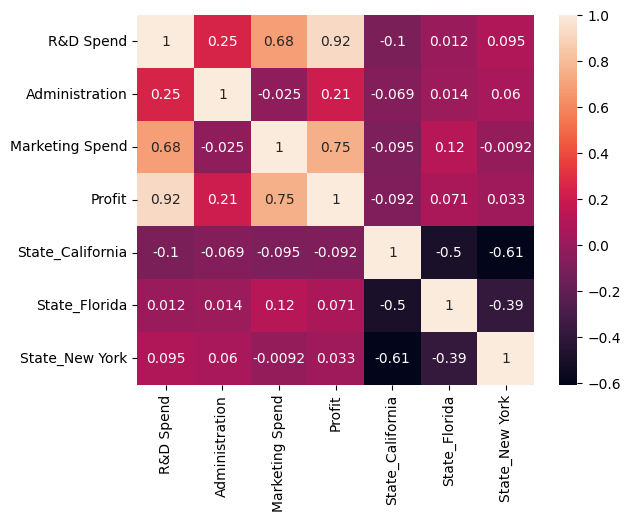

In [ ]:
import seaborn as sns
sns.heatmap(d.corr(),annot = True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
rg = LinearRegression()

In [ ]:
rg.fit(x,y)

LinearRegression()

In [ ]:
rg.coef_,rg.intercept_

(array([[ 7.06309388e-01,  3.35557337e-02,  7.37079527e-02,
          1.54603373e+02,  2.31346347e+03, -2.46806684e+03]]),
 array([43210.7888911]))

In [ ]:
ypred = rg.predict(x)

In [ ]:
r2_score(y,ypred)

0.8778631247742841

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


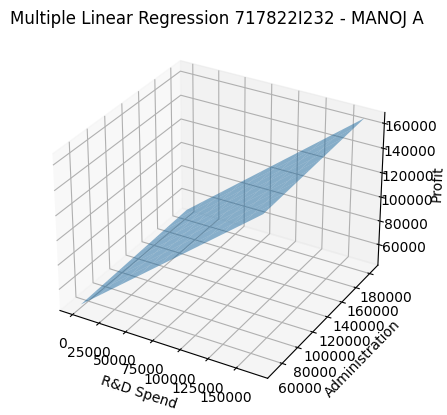

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x and y are defined properly elsewhere in your code

# Generating grid points for R&D Spend and Administration (assuming they are the first two columns)
x1_range = np.linspace(min(x.iloc[:, 0]), max(x.iloc[:, 0]), 10)
x2_range = np.linspace(min(x.iloc[:, 1]), max(x.iloc[:, 1]), 10)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

# Assuming rg is your trained model
# Predicting with all features including State variables
X_grid = np.column_stack((X1_grid.ravel(), X2_grid.ravel(),
                          np.zeros_like(X1_grid.ravel()),
                          np.zeros_like(X1_grid.ravel()),
                          np.zeros_like(X1_grid.ravel()),
                          np.zeros_like(X1_grid.ravel())))
Y_grid = rg.predict(X_grid).reshape(X1_grid.shape)

# Creating the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the plane of best fit using only R&D Spend and Administration
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.5)

# Adding labels and legend
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
ax.set_title('Multiple Linear Regression 717822I232 - MANOJ A')

# Show the plot
plt.show()
